# Assignment Report for Data and Reporting Analyst position

### Introduction
This analysis used the data downloaded from www.grouplens.org, it is based on the discretion and elaboration in the Readme file. The report is produced in Jupyter Notebook R kernel to show both the coding and data visualization at the same time. Section -1, focused on building data set process; Section-2, on answering the first question, Section-3 on the second question and Section-4 on the third questions. As the questions are open-ended, additional analysis/ views are included

# 1. Building Data set

In [86]:
library(ggplot2)
library(data.table)
library(tidyverse)
library(plyr)
library(dplyr)
library(repr)

#### Data exploration and step by step loading and cleaning

In [3]:
#loading users data
users = readLines('C://Users/user/Desktop/movielens/users.dat')
users = as.data.frame(do.call("rbind", strsplit(users, "::")),stringsAsFactors = FALSE,age=as.numeric(levels(age))[age], occupation=as.character(occupation))
names(users) = c("userID", "gender", "age", "occupation","zip-code")
users= users %>% filter_at(vars(userID,gender,age,occupation,"zip-code"),all_vars(!is.na(.)))

In [4]:
# loading movies.dat
movie = readLines("C://Users/user/Desktop/movielens/movies.dat")
movie = as.data.frame(do.call("rbind",strsplit(movie,"::")),stringsAsFactors = FALSE,
                       movieId = as.numeric(levels(movieId))[movieId],
                        title = as.character(title),
                        genres = as.character(genres)) 
names(movie) = c("movieID","title","genres")

In [5]:
#Loading Ratings.DAT file
ratings = readLines("C://Users/user/Desktop/movielens/ratings.dat")
ratings = as.data.frame(do.call("rbind", strsplit(ratings, "::")),stringsAsFactors = FALSE, )
names(ratings) = c("userID", "movieID", "rating", "timestamp")

In [7]:
na_user = users %>% filter(is.na(userID) | is.na(gender)|is.na(age)|is.na(occupation))
na_movie = movie %>% filter(is.na(movieID)|is.na(title)|is.na(genres))
na_rating= ratings %>% filter(is.na(userID)| is.na(movieID)|is.na(rating)| is.na(timestamp))

In [8]:
# further check is needed to see whether NA are introduced by coercion
ratings_df <- ratings %>% mutate(timestamp = as_datetime(timestamp))
summary(ratings_df)

Warning message:
"All formats failed to parse. No formats found."

    userID            movieID             rating            timestamp      
 Length:1000209     Length:1000209     Length:1000209     Min.   :NA       
 Class :character   Class :character   Class :character   1st Qu.:NA       
 Mode  :character   Mode  :character   Mode  :character   Median :NA       
                                                          Mean   :NA       
                                                          3rd Qu.:NA       
                                                          Max.   :NA       
                                                          NA's   :1000209  

### Section-2  Answering "What are the Top 10 movies in 2000?"

#### Methodology for determining the top 10 in 2000
It is possible to get a quick summary of the data by calculating a frequency table, given the movieID doesn't have different values. Thus, I used a frequency table function, table(), to calculate the number of occurrences of every unique value (movieID), which is the number of voted/rated for each movieID. Further, to filter out by year, extraction function is used, the title and year of release are separated. Sorting in descending order identified the top ten movies as shown below.
 

In [9]:
number_vote = as.data.frame(table(ratings$movieID))
names(number_vote) = c("movieID", "no.-of-users-voted")
head(number_vote)

movieID,no.-of-users-voted
1,2077
10,888
100,128
1000,20
1002,8
1003,121


In [10]:
# merging the no.-of-users-voted to "movie" data set
number_vote_movie_merge = merge(number_vote, movie, by = "movieID")
#sortin new dataset with decreasing Number.-of-Users-Voted
number_vote_movie_merge = number_vote_movie_merge[order(number_vote_movie_merge$"no.-of-users-voted", decreasing = TRUE),] %>% na.omit() 
head(number_vote_movie_merge, )

,movieID,no.-of-users-voted,title,genres
1917,2858,3428,American Beauty (1999),Comedy|Drama
1641,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
192,1196,2990,Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Drama|Sci-Fi|War
209,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
3183,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
1026,2028,2653,Saving Private Ryan (1998),Action|Drama|War


In [11]:
# extracting the (year) from the title, preparing for filtering 
release_year = stringi::stri_extract(number_vote_movie_merge$title, regex = "(\\d{4})", comments = TRUE ) %>% as.numeric() %>% na.omit()
# forming the table that has separate realease year
number_vote_title_year = number_vote_movie_merge %>% mutate(release_year = as.integer(release_year)) 
head(number_vote_title_year)

movieID,no.-of-users-voted,title,genres,release_year
2858,3428,American Beauty (1999),Comedy|Drama,1999
260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1977
1196,2990,Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Drama|Sci-Fi|War,1980
1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,1983
480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi,1993
2028,2653,Saving Private Ryan (1998),Action|Drama|War,1998


#### The table below shows the top ten movies released in 2000, which the famous Gladiator got a higher vote/rate. Further, six out of the ten top-rated movies are from the "Action" category. Comparing the 1980,1990 and 2000 users rate, Action movies representation in the top 10 has increased from 30%, 40%, and 60% respectively. 

In [12]:
top_in_2000= number_vote_title_year %>% filter(release_year == 2000) 
head(top_in_2000,n=10)

movieID,no.-of-users-voted,title,genres,release_year
3578,1924,Gladiator (2000),Action|Drama,2000
3793,1511,X-Men (2000),Action|Sci-Fi,2000
3481,1373,High Fidelity (2000),Comedy,2000
3751,1329,Chicken Run (2000),Animation|Children's|Comedy,2000
3408,1315,Erin Brockovich (2000),Drama,2000
3623,1313,Mission: Impossible 2 (2000),Action|Thriller,2000
3753,1240,"Patriot, The (2000)",Action|Drama|War,2000
3755,1013,"Perfect Storm, The (2000)",Action|Adventure|Thriller,2000
3897,994,Almost Famous (2000),Comedy|Drama,2000
3555,908,U-571 (2000),Action|Thriller,2000


In [14]:
# for comparision in 1980 and in 1990 
top_in_1990 = number_vote_title_year %>% filter(release_year == 1990) 
top_in_1980 = number_vote_title_year %>% filter(release_year == 1980)
head(top_in_1980,n=10)

movieID,no.-of-users-voted,title,genres,release_year
1196,2990,Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Drama|Sci-Fi|War,1980
2791,1731,Airplane! (1980),Comedy,1980
1220,1341,"Blues Brothers, The (1980)",Action|Comedy|Musical,1980
1258,1087,"Shining, The (1980)",Horror,1980
3552,967,Caddyshack (1980),Comedy,1980
2641,846,Superman II (1980),Action|Adventure|Sci-Fi,1980
2150,695,"Gods Must Be Crazy, The (1980)",Comedy,1980
1228,677,Raging Bull (1980),Drama,1980
1956,507,Ordinary People (1980),Drama,1980
2088,471,Popeye (1980),Adventure|Comedy|Musical,1980


### Section-3  "Please describe the characteristics of users likely to rate a fantasy movie as a 5?"

#### Merging/ joining the whole data set is necessary, to understanding users characters who rated fantasy as a 5

In [15]:
# merging data
movies_ratings = merge(movie,ratings,by= "movieID")
movielens=merge(movies_ratings,users, by="userID",stringsAsFactors = FALSE) %>% na.omit()
# filtering genres that incorporates Fantasy
fantasy = movielens%>% filter(str_detect(genres,"Fantasy")) %>% filter(rating==5)


In [16]:
# similar to section-1, extracting the (year) from the title and preparing for filtering 
fantasy_release_year = stringi::stri_extract(fantasy$title, regex = "(\\d{4})", comments = TRUE ) %>% as.numeric() %>% na.omit()
# forming the table that has separate realease year
fantasy = fantasy %>% mutate(release_year = as.integer(fantasy_release_year)) 
head(fantasy)

userID,movieID,title,genres,rating,timestamp,gender,age,occupation,zip-code,release_year
10,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,5,979168077,F,35,1,95370,1977
10,2140,"Dark Crystal, The (1982)",Children's|Fantasy|Sci-Fi,5,979168295,F,35,1,95370,1982
10,2015,"Absent Minded Professor, The (1961)",Children's|Comedy|Fantasy,5,978228601,F,35,1,95370,1961
10,2174,Beetlejuice (1988),Comedy|Fantasy,5,978227669,F,35,1,95370,1988
10,1009,Escape to Witch Mountain (1975),Adventure|Children's|Fantasy,5,979168267,F,35,1,95370,1975
10,1654,FairyTale: A True Story (1997),Children's|Drama|Fantasy,5,979168346,F,35,1,95370,1997


### Characterstics of Users who rated Fantasy as a 5

#### Gender

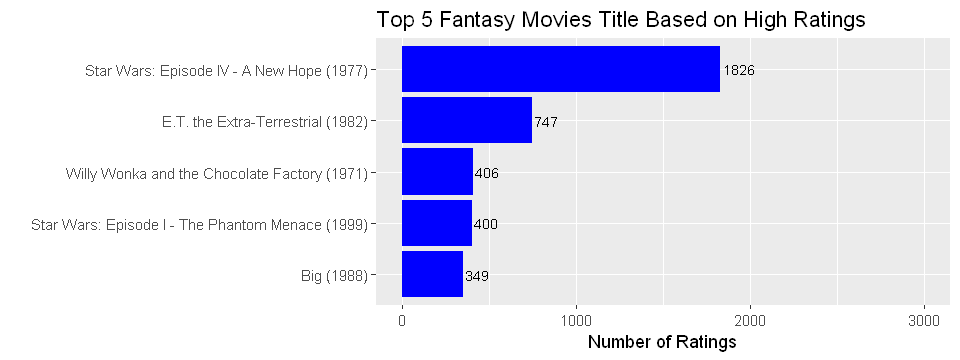

In [33]:
top_title = fantasy %>% group_by(title) %>% summarize(count=n()) %>% top_n(5,count) %>% arrange(desc(count))
top_title %>% 
  ggplot(aes(x=reorder(title, count), y=count)) +
  geom_bar(stat='identity', fill="blue") + coord_flip(y=c(0, 3000)) +
  labs(x="", y="Number of Ratings") +
  geom_text(aes(label= count), hjust=-0.1, size=3) +
  labs(title="Top 5 Fantasy Movies Title Based on High Ratings")

###  Based on Age Group of users who rated fantasy as a 5

The age group who likely rate fantasy movies are from the young (20-30) and the teenage (10-19) group. On the contrary, the middle-age group (40-49) has shown less interest to rate fantasy as 5 than their elders (50-59).

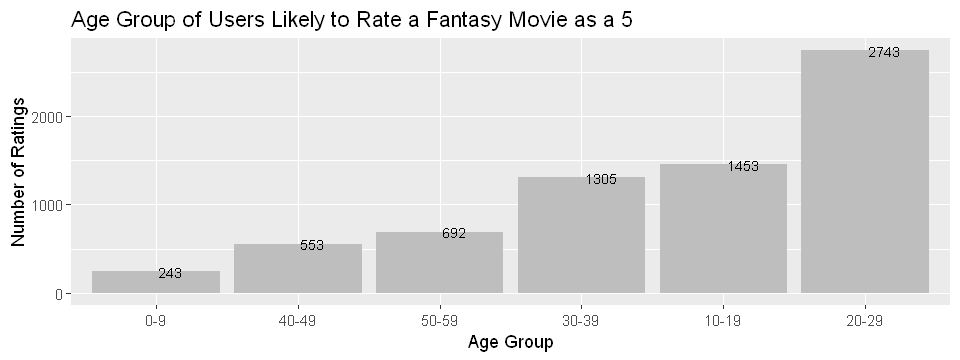

In [35]:
# Age lable from Readme text in the data
agelabel = c('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79')
fantasy$age_group <- cut(as.numeric(fantasy$age),seq(0,81,10), include.lowest=TRUE, right=FALSE, labels=agelabel)
rating_by_age_group <- fantasy %>% group_by(age_group) %>% summarise(count=n())
rating_by_age_group %>% 
  ggplot(aes(x=reorder(age_group, count), y=count)) +
  geom_bar(stat='identity', fill="gray") + 
  labs(x="Age Group", y="Number of Ratings") +
  geom_text(aes(label= count), hjust=-0.1, size=3) +
  labs(title="Age Group of Users Likely to Rate a Fantasy Movie as a 5")

### Based on Gender Group of users who rated fantasy as a 5

The percentage proportion difference between male and female who likely to rate fantasy as a 5 is huge, ~ 74% to 26% respectively. On the other hand, females have shown a better interest for romance to rate as a 5, with a proportion of 62% for males to 37% for females.

In [51]:
# gender proportion for fantasy movies
library(data.table)
setDT(fantasy)[, list(Males = sum(gender == "M")/.N *100, 
                 Females = sum(gender == "F")/.N *100),]

Males,Females
73.55845,26.44155


In [53]:
# gender proportion for romance movies who likely rate as a 5
romance = movielens %>% filter(str_detect(genres,"Romance")) %>% filter(rating==5)
setDT(romance)[, list(Males = sum(gender == "M")/.N *100, 
                 Females = sum(gender == "F")/.N *100),]

Males,Females
62.307,37.693


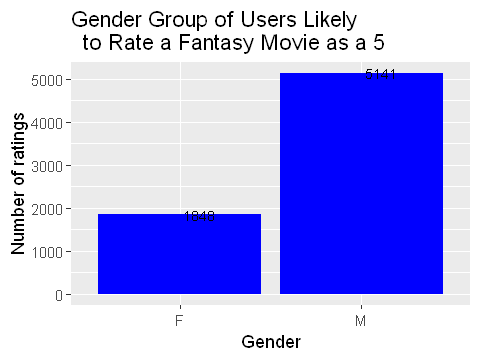

In [48]:
gender_prop <- fantasy %>% group_by(gender) %>% summarize(count=n()) %>% top_n(5,count) %>% arrange(desc(count))
gender_prop %>%
ggplot(aes(x=reorder(gender, count), y=count)) +
  geom_bar(stat='identity', fill="blue") +
  labs(x="Gender", y="Number of ratings") +
  geom_text(aes(label= count), hjust=-0.1, size=3) +
  labs(title="Gender Group of Users Likely
  to Rate a Fantasy Movie as a 5 ")
options(repr.plot.width=8, repr.plot.height=3)

### Based on Occupation Group of users who rated fantasy as a 5

The top 5 occupations who likely rate fantasy as a 5 are college/graduate students, executive/managerial, technician/engineer, academic/educator. Given the nature of fantasy movies, which needs the activity of imagining things, professionals with post-secondary academic background favor them. 

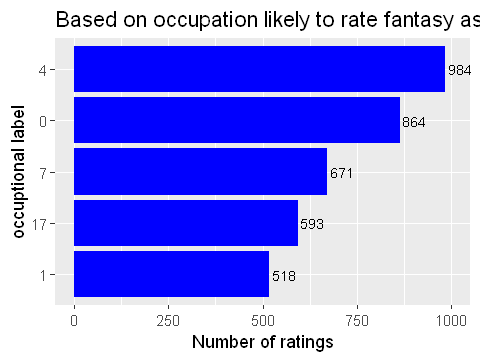

In [75]:
occup_label = c( "other-not specified","academic/educator","artist", "clerical/admin","college/grad student",
                "customer service","doctor/health care","executive/managerial","farmer","homemaker","K-12 student",
                "lawyer","programmer","retired","sales/marketing","scientist","self-employed","technician/engineer",
                "tradesman/craftsman","unemployed","writer")

# I tried to
top_occupation <- fantasy %>% group_by(occupation) %>% summarize(count=n()) %>% top_n(5,count) %>% arrange(desc(count))
top_occupation %>% 
  ggplot(aes(x=reorder(occupation, count), y=count)) +
  geom_bar(stat='identity', fill="blue") + coord_flip(y=c(0, 1000)) +
  labs(x="occuptional label", y="Number of ratings") +
  geom_text(aes(label= count), hjust=-0.1, size=3) +
  labs(title="Based on occupation likely to rate fantasy as 5" )
options(repr.plot.width=8, repr.plot.height=3)


### Section-3 Provide an analysis of movie ratings by one of the following user characteristics: Gender- Occupation

##### Occupational lable from Readme file
0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

I tried to incorporate the occupation label as I did for age-group, but my Jupiter notebook takes time to process. The highest male percentage based on occupation is from tradesman/craftsman (lable-18) sector and the least is from farming(lable-9). Similarly, the doctors/health care sector (lable-6) also shown the least male representation in the rating 

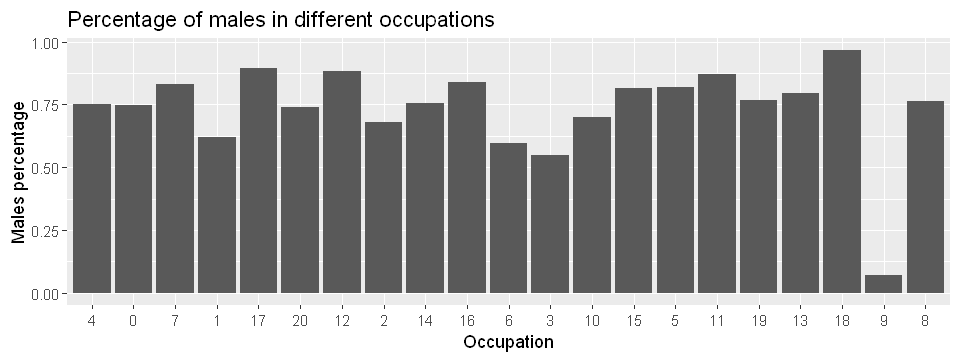

In [103]:
gender_movielens = ddply(movielens, ~occupation, summarize, perc_male = (length(gender[gender == "M"])/length(gender)), counts = -length(userID))
genderPlot = ggplot(gender_movielens, aes(x = reorder(occupation, counts), perc_male)) + geom_bar(stat = "identity")+
labs(title="Percentage of males in different occupations")+labs(x="Occupation", y="Males percentage")
genderPlot

In [110]:
data= readLines('C://Users/user/Movielens-assignment .ipynb')

[1] "C:/Users/user"